In [1]:
import ROOT as rt
import root_numpy as rtnp
import numpy as np
from matplotlib import pyplot as plt
import sys
sys.path.append('/nfshome/christiw/llp/delayed_jet_analyzer/lib/')
from histo_utilities import create_TH1D, create_TH2D, std_color_list, binning2d, histo2D_projectionFit
from helper_functions import getRecoTime
from array import array
import CMS_lumi, tdrstyle
import math
import uproot
tdrstyle.setTDRStyle()
CMS_lumi.writeExtraText = 1

CMS_lumi.extraText = " Simulation Preliminary"

donotdelete = []

Welcome to JupyROOT 6.16/00


In [8]:
fpath = {}
tree = {}
bkg_path = "/home/cms/Desktop/LLP/delayed_jet_analyzer/"
bkg_path = "/nfshome/christiw/llp/jet_timing_studies_root/"
lumi = 137000 #in pb-1

fpath['WJetsToLNu'] = bkg_path+"jet_timing_studies_ntuple_RunIIFall17DRPremix_WJetsToLNu_TuneCP5_13TeV-madgraphMLM-pythia8.root"
fpath['bbbb_mh125_ctau1'] = bkg_path+'jet_timing_studies_ntuple_bbbb_vh_ISR_mh125_mx50_pl1000_ev100000.root'
fpath['bbbb_mh125_ctau10'] = bkg_path+'jet_timing_studies_ntuple_bbbb_vh_ISR_mh125_mx50_pl10000_ev100000.root'
fpath['bbbb_mh2000_ctau1'] = bkg_path+'jet_timing_studies_ntuple_bbbb_vh_ISR_mh2000_mx975_pl1000_ev100000.root'

# fpath['WJetsToLNu'] = '/nfshome/christiw/llp/jetNtuple_RunIISummer16/test/jet_timing_studies_ntuple_RunIIFall17DRPremix_WJetsToLNu_1J_TuneCP5_13TeV-amcatnloFXFX-pythia8.root'

# fpath['qcd300to500'] ='/home/cms/Desktop/LLP/jetNtuple_4jet/jetNtuple_QCD_HT300to500.root'
# fpath['m500ctau30'] = '/home/cms/Desktop/LLP/jetNtuple_4jet/jetNtuple_M-500_CTau-30mm.root'

# fpath['m500ctau3r1'] = '/home/cms/Desktop/LLP/jetNtuple_4jet/jetNtuple_M-500_CTau-3mm_rlt1cm_zlt10cm.root'
# fpath['m500ctau3r0p1'] = '/home/cms/Desktop/LLP/jetNtuple_4jet/jetNtuple_M-500_CTau-3mm_rlt0p1cm_zlt10cm.root'
legend = {'m500ctau1000', 'Mass = 500 GeV, ctau = 1 m'}


for k,v in fpath.items():
    print (k, v)
    root_dir = uproot.open(v) 
    tree[k] = root_dir['ntuples']['llp']
    a = tree[k]["jetPt"].array()

    print (a[:-1][0])

WJetsToLNu /nfshome/christiw/llp/jet_timing_studies_root/jet_timing_studies_ntuple_RunIIFall17DRPremix_WJetsToLNu_TuneCP5_13TeV-madgraphMLM-pythia8.root
[59.339394 27.090656 22.657576]
bbbb_mh125_ctau1 /nfshome/christiw/llp/jet_timing_studies_root/jet_timing_studies_ntuple_bbbb_vh_ISR_mh125_mx50_pl1000_ev100000.root
[64.42451  51.139175 37.67556 ]
bbbb_mh125_ctau10 /nfshome/christiw/llp/jet_timing_studies_root/jet_timing_studies_ntuple_bbbb_vh_ISR_mh125_mx50_pl10000_ev100000.root
[30.621801]
bbbb_mh2000_ctau1 /nfshome/christiw/llp/jet_timing_studies_root/jet_timing_studies_ntuple_bbbb_vh_ISR_mh2000_mx975_pl1000_ev100000.root
[539.81354 272.1115  250.49152 248.0052  144.67659 101.62265]


In [7]:
T = tree['WJetsToLNu']



# Reco Time

In [10]:
T = tree['bbbb_mh125_ctau1']
max_jet_reco_time = np.array([x[0] if len(x) else -1 for x in T['jet_rechit_T']])
max_jet_reco_time1 = np.array([x[0] if len(x) else -1 for x in T['jet_rechit_T_Ecut1']])
max_jet_reco_time2 = np.array([x[0] if len(x) else -1 for x in T['jet_rechit_T_Ecut2']])
max_jet_reco_time3 = np.array([x[0] if len(x) else -1 for x in T['jet_rechit_T_Ecut3']])
max_jet_reco_time4 = np.array([x[0] if len(x) else -1 for x in T['jet_rechit_T_Ecut4']])


c = rt.TCanvas('c','c', 800, 600)
h = {}
# h['max_jet_pv_reco_time'] = create_TH1D( max_jet_pv_reco_time, axis_title=['Reconstructed time [ns]', 'events'], name='max_jet_pv_reco_time', binning=[200,-5,15])
h['max_jet_reco_time'] = create_TH1D( max_jet_reco_time, axis_title=['Reconstructed time [ns]', 'events'], name='max_jet_reco_time', binning=[200,-15,15])
h['max_jet_reco_time1'] = create_TH1D( max_jet_reco_time1, axis_title=['Reconstructed time [ns]', 'events'], name='max_jet_reco_time', binning=[200,-15,15])
h['max_jet_reco_time2'] = create_TH1D( max_jet_reco_time2, axis_title=['Reconstructed time [ns]', 'events'], name='max_jet_reco_time', binning=[200,-15,15])
h['max_jet_reco_time3'] = create_TH1D( max_jet_reco_time3, axis_title=['Reconstructed time [ns]', 'events'], name='max_jet_reco_time', binning=[200,-15,15])
h['max_jet_reco_time4'] = create_TH1D( max_jet_reco_time4, axis_title=['Reconstructed time [ns]', 'events'], name='max_jet_reco_time', binning=[200,-15,15])

# c.SetLogy()
h['max_jet_reco_time'].SetLineColor(1)
h['max_jet_reco_time1'].SetLineColor(2)
h['max_jet_reco_time2'].SetLineColor(4)
h['max_jet_reco_time3'].SetLineColor(8)
h['max_jet_reco_time4'].SetLineColor(6)

# h['max_jet_reco_time'].GetYaxis().SetRangeUser(0.00001,10000)
h['max_jet_reco_time1'].DrawNormalized('')
h['max_jet_reco_time2'].DrawNormalized('same')
h['max_jet_reco_time3'].DrawNormalized('same')
h['max_jet_reco_time4'].DrawNormalized('same')
h['max_jet_reco_time'].DrawNormalized('same')

# h['max_jet_reco_time4'].GetYaxis().SetRangeUser(0,1)

# print(h['max_jet_pv_reco_time'].Integral())

# h['max_jet_pv_reco_time'].Draw('same')
c.SetLogy()


# rt.enableJSVis()
c.Draw()
# rt.disableJSVis()

c.SaveAs("../plots/max_jet_reco_time.pdf")

TypeError: 'TBranch' object is not iterable

# Gen Time

[-666.0261     -666.0261        1.5604181     0.79142284] [-666.        -666.           1.5865381    0.8175428] [0.02611993]
[-666.] 1.5865381


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: max_pt_gen_time (Potential memory leak).
Info in <TCanvas::Print>: pdf file ../plots/gen_time_bs_compare.pdf has been created


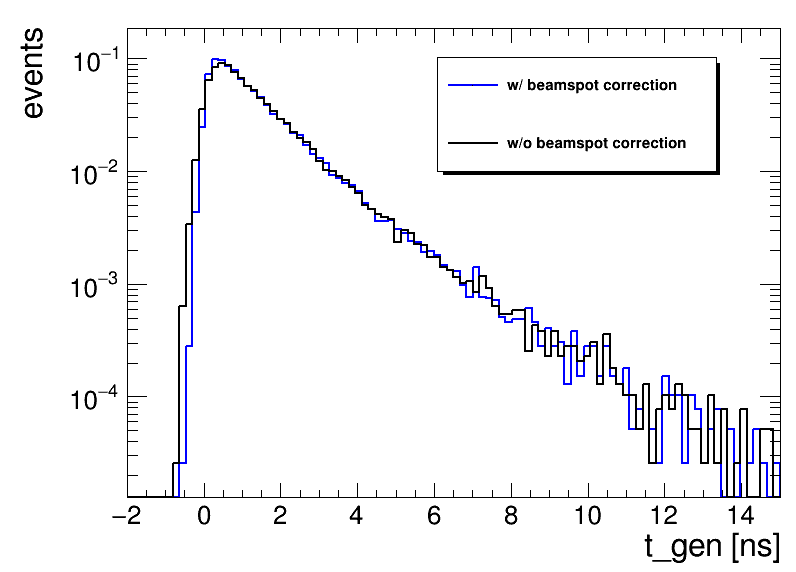

In [13]:
T = tree['bbbb_mh125_ctau1']

gLLP_travel_time = T['gLLP_travel_time'].array()
genVertexT = T['genVertexT'].array()
gen_time = T['gen_time'].array()
gen_time_pv = T['gen_time_pv'].array()
gen_time_pv = np.reshape(gen_time_pv,(-1,1))
gen_time_nobs = gen_time - np.reshape(genVertexT,(-1,1)) #without beamspot correction


print(gen_time_nobs[0],gen_time[0],np.reshape(genVertexT,(-1,1))[0])
max_pt_gen_time = np.array([np.max(x) if len(x) else -1 for x in gen_time])
max_pt_gen_time_nobs = np.array([np.max(x) if len(x) else -1 for x in gen_time_nobs])

gen_time = np.reshape(gen_time,(-1,1))

print(gen_time[0],max_pt_gen_time[0])

c = rt.TCanvas('c','c', 800, 600)
h = {}
h['max_pt_gen_time_nobs'] = create_TH1D( max_pt_gen_time, axis_title=['t_gen [ns]', 'events'], name='max_pt_gen_time', binning=[100,-2,15])

h['max_pt_gen_time'] = create_TH1D( max_pt_gen_time_nobs, axis_title=['t_gen [ns]', 'events'], name='max_pt_gen_time', binning=[100,-2,15])
h['max_pt_gen_time'].SetLineColor(4)
# c.SetLogy()

leg = rt.TLegend(0.55,0.70,0.9,0.9);
leg.AddEntry(h['max_pt_gen_time'],'w/ beamspot correction')
leg.AddEntry(h['max_pt_gen_time_nobs'],'w/o beamspot correction')

h['max_pt_gen_time'].DrawNormalized()
h['max_pt_gen_time_nobs'].DrawNormalized('same')
leg.Draw()
c.SetLogy()
c.Draw()
c.SaveAs("../plots/gen_time_bs_compare.pdf")

[-666.        -666.           1.5865381    0.8175428    1.6995276
 -666.        -666.        -666.        -666.        -666.       ] [-6.6600000e+02  2.2087402e+00 -6.6600000e+02  5.0972700e-01
 -6.6600000e+02  5.4875284e-01 -6.6600000e+02 -6.6600000e+02
 -6.6600000e+02  1.4065639e+00]
-666.0 1.5865381


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: max_pt_gen_time (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: max_pt_gen_time (Potential memory leak).
Info in <TCanvas::Print>: pdf file ../plots/gen_time_photon_correction_compare.pdf has been created


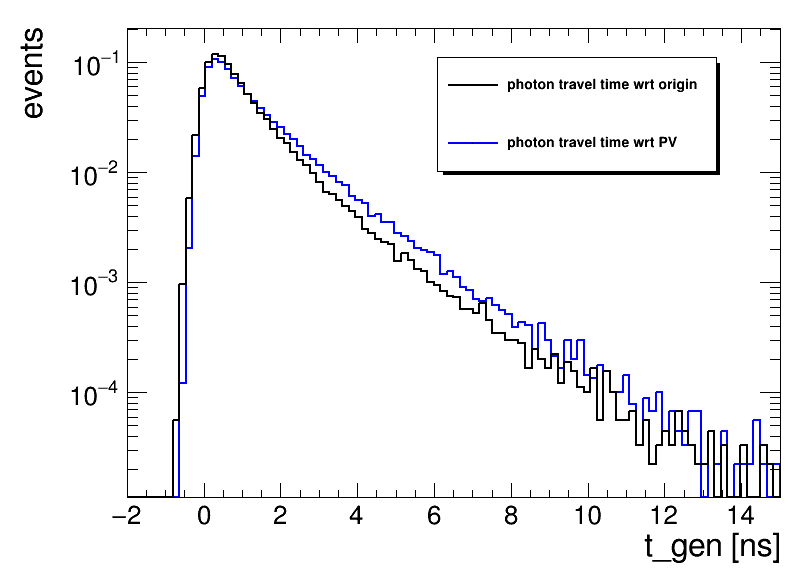

In [15]:
#reco vs. gen time different photon travel time correction
T = tree['bbbb_mh125_ctau1']
gen_time = T['gen_time'].array()
gen_time = np.reshape(gen_time,(-1,1))
gen_time = gen_time.flatten('F')
gen_time_pv = T['gen_time_pv'].array()
gen_time_pv = gen_time_pv.flatten('F')

print(gen_time[:10],gen_time_pv[:10])


print(gen_time[0],max_pt_gen_time[0])

c = rt.TCanvas('c','c', 800, 600)
h = {}
h['gen_time'] = create_TH1D( gen_time, axis_title=['t_gen [ns]', 'events'], name='max_pt_gen_time', binning=[100,-2,15])
h['gen_time_pv'] = create_TH1D( gen_time_pv, axis_title=['t_gen [ns]', 'events'], name='max_pt_gen_time', binning=[100,-2,15])
h['gen_time_pv'].SetLineColor(4)
# c.SetLogy()

leg = rt.TLegend(0.55,0.70,0.9,0.9);
leg.AddEntry(h['gen_time'],'photon travel time wrt origin')
leg.AddEntry(h['gen_time_pv'],'photon travel time wrt PV')

h['gen_time_pv'].DrawNormalized()
h['gen_time'].DrawNormalized('same')
leg.Draw()
c.SetLogy()
c.Draw()
c.SaveAs("../plots/gen_time_photon_correction_compare.pdf")




# Matching recojet with genParticles

In [20]:
gLLP_decay_radius = np.sqrt(np.square(T['gLLP_decay_vertex_x'].array())+np.square(T['gLLP_decay_vertex_y'].array())) # (events, 2) 2LLP
gLLP_daughter_match_jet_index = T['gLLP_daughter_match_jet_index'].array()
gLLP_daughter_travel_time = T['gLLP_daughter_travel_time'].array()
genVertexT = T['genVertexT'].array()
matched_jets = np.logical_and(np.logical_not( gLLP_daughter_travel_time == -666), np.logical_not( gLLP_daughter_match_jet_index == 666))
gen_time_var = T['gen_time'].array()
gen_time_pv = T['gen_time_pv'].array()
jet_pt =T['jetPt'].array()
genJet_pt = T['genJetPt'].array()
gLLP_daughter_match_jet_index = gLLP_daughter_match_jet_index[matched_jets]
rechit_T_1 =  T['jet_rechit_T_Ecut1'].array()
rechit_E_1 =  T['jet_rechit_E_Ecut1'].array()

rechit_E =  T['jet_rechit_E'].array()
rechit_T =  T['jet_rechit_T'].array()
jet_pt =  T['jetPt'].array()
genJet_pt = T['genJetPt'].array()

ecal_energy = []
time_response = []
time_ecal = []
time_rechitcut = []
time_diff = []
reco_time = []
gen_time = []
energy_ratio = []
energy_ratio_nomerge = []

ECALenergy_ratio = []
time_tgen = []
time_pt = []
for i in range(len(T['gLLP_daughter_match_jet_index'].array())): #loop through each event
    for j in range(4): #loop through each gen particle
        index = T['gLLP_daughter_match_jet_index'].array()[i][j]
#         genjet_index = T['gLLP_daughter_match_genJet_index'].array()[i][j]
        if not index == 666 and matched_jets[i][j]: #matched and barrel jets
            t_reco = rechit_T_1[i][index]
            pt = T['gLLP_daughter_pt'].array()[i][j]
            if j <= 1:
                llpid = 0
            else:
                llpid = 1
            time_diff.append(t_reco-gen_time_var[i][j])
            ecal_energy.append(rechit_E_1[i][index])

            reco_time.append(rechit_T_1[i][index])
            gen_time.append(gen_time_var[i][j])
    if i%1000 == 0:
        print(i)
#             if not genjet_index == 666:
#                 temp = list(T['gLLP_daughter_match_jet_index'].array()[i])
#                 temp.pop(j)
#                 energy_ratio.append([jet_pt[i][jet_index]/genJet_pt[i][genjet_index],gen_time_var[i][j]])
#                 if not (index in temp):
#                     energy_ratio_nomerge.append([jet_pt[i][jet_index]/genJet_pt[i][genjet_index],gen_time_var[i][j]])
#                     ECALenergy_ratio.append([rechit_E_1[i][jet_index]/genJet_pt[i][genjet_index],gen_time_var[i][j]])



0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000


# Time Response using different reco_time algorithm

In [ ]:
# 0 is energy weighted, 1 is energy squared weighted, 2 is median
gLLP_daughter_match_jet_index = T['gLLP_daughter_match_jet_index']
gLLP_daughter_travel_time = T['gLLP_daughter_travel_time']
matched_jets = np.logical_and(np.logical_not( gLLP_daughter_travel_time == -666), np.logical_not( gLLP_daughter_match_jet_index == 666))
gLLP_daughter_match_jet_index = gLLP_daughter_match_jet_index[matched_jets]
rechit_T_1 =  T['jet_rechit_T_Ecut1']
gen_time = T['gen_time']
jet_rechits_T = T['jet_rechits_T']
jet_rechits_E = T['jet_rechits_E'] #(events,jets,rechits)

time_diff_algorithm = []
algorithms = [0,1,2]
rechit = 1
reco_time_check = []
reco_time_comp = []
for algo in algorithms:
    reco_time_alg = []
    reco_time = []
    time_diff = []
    gen_time_matched = []
    for i in range(len(T['gLLP_daughter_match_jet_index'])): #loop through each event
        for j in range(4): #loop through each gen particle
            index = T['gLLP_daughter_match_jet_index'][i][j]
            if not index == 666 and matched_jets[i][j]: #matched and barrel jets
                reco_temp = getRecoTime(algo, rechit,jet_rechits_T[i][index],jet_rechits_E[i][index])
                if not reco_temp == None:
                    time_diff.append(reco_temp-gen_time[i][j])
                    gen_time_matched.append(gen_time[i][j])
                    reco_time_check.append(rechit_T_1[i][index])
                    reco_time_comp.append(reco_temp)
    time_diff = np.array(time_diff)
    time_diff_algorithm.append(time_diff)
    gen_time_matched = np.array(gen_time_matched)


In [ ]:
draw = True
c = rt.TCanvas('c1','c1', 800, 600)
leg = rt.TLegend(0.65,0.60,0.95,0.92)
# leg.SetTextFont(42)
leg.SetTextSize(0.03)
leg.SetEntrySeparation(0.01)
# # Create 2d numpy array matched-jets vs. LLP decay radius
h = {}
proj = []
    
for i in range(len(algorithms)):
    key = 'bin'+str(i)
    h['time_algorithm'] = create_TH1D(time_diff_algorithm[i], axis_title=['t_Reco - t_gen', 'events'], name="h"+str(i), binning=[50,-10,10])

    proj.append(h['time_algorithm'])
    if i == 0:
        leg.AddEntry(proj[i],'Energy weighted')
    elif i == 1:
        leg.AddEntry(proj[i],'Energy-squared weighted')
    else:
        leg.AddEntry(proj[i],'Median')

proj[0].GetYaxis().SetTitle("Events")
if draw:
    for i in range(len(algorithms)):
        proj[i].SetLineColor(std_color_list[i])
        print(proj[i].Integral())
        proj[i].Scale(1./proj[i].Integral())

        if i == 0:
            proj[i].DrawCopy()
        if i == 2:
            proj[i].SetLineColor(4)

        proj[i].DrawCopy('SAME')

    leg.Draw()
    c.SetLogy()
    c.Draw()
    c.SaveAs("../plots/time_response_algorithm.pdf")
# c.SaveAs('time_response_ecal.pdf')
assert(len(algorithms) == len(proj))

# Energy Ratio between gen jet and ECAL/reco jet

In [ ]:
draw = False
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.55,0.70,0.9,0.9);
energy_ratio = np.array(energy_ratio)
ECALenergy_ratio = np.array(ECALenergy_ratio)
energy_ratio_nomerge = np.array(energy_ratio_nomerge)
h = {}
proj = []
h['ECALenergy_ratio'] = create_TH2D(energy_ratio_nomerge, axis_title = ['Reco energy / genJet energy','t_gen [ns]',''], binning=[250,-2,10,500,0,10])

h['energy_ratio'] = create_TH2D(energy_ratio, axis_title = ['Reco energy / genJet energy','t_gen [ns]',''], binning=[250,-2,10,500,0,10])
h['energy_ratio'].SetLineColor(4)
# h['energy_ratio'].DrawCopy()
# c.Draw()
bins = binning2d(h['energy_ratio'],200, 'y')
for i in range(len(bins)-1):
    key = 'bin'+str(i)
    proj.append(h['energy_ratio'].ProjectionX("h"+str(i),bins[i],bins[i+1]-1))
    y_low = h['energy_ratio'].GetYaxis().GetBinLowEdge(bins[i])
    y_up = h['energy_ratio'].GetYaxis().GetBinLowEdge(bins[i+1]-1)+h['energy_ratio'].GetYaxis().GetBinWidth(1)
    leg.AddEntry(proj[i],'t_gen '+str(y_low)+' - '+str(y_up))

proj[0].GetYaxis().SetTitle("Events")
# proj[0].GetYaxis().SetRangeUser(0,1)
for i in range(len(bins)-1):
    proj[i].SetLineColor(i+1)
    if draw:
#         proj[i].Rebin(60)
        print(proj[i].Integral())
        proj[i].Scale(1./proj[i].Integral())
    #     proj[i].GetYaxis().SetRangeUser(0,0.5)

        if i == 0:
            proj[i].DrawCopy()
        if i == 2:
            proj[i].SetLineColor(4)

        proj[i].DrawCopy('SAME')
if draw:
    leg.Draw()
    c.SetLogy()
    c.Draw()
    c.SaveAs('../plots/energy_ratio.pdf')
assert(len(bins)-1 == len(proj))

In [ ]:

sigma_eff = True
c = rt.TCanvas('c', 'c', 800, 600)
legend = rt.TLegend(0.55,0.70,0.9,0.9);


rt.gStyle.SetOptStat(000)

scale1,scale_eff1, res1,res_eff1 = histo2D_projectionFit(h['energy_ratio'],bins,0.5,2, 'y')
scale2,scale_eff2, res2,res_eff2 = histo2D_projectionFit(h['ECALenergy_ratio'],bins,0.5,2, 'y')
legend.AddEntry(scale1,"Total Jet Energy")
legend.AddEntry(scale2,"No Merged Jets")
scale1.SetXTitle('Gen Time [ns]')
scale1.SetYTitle('Reco Energy / Total Gen Jet Energy')
scale1.GetYaxis().SetRangeUser(0.5,1)
scale1.SetLineColor(4)
scale1.DrawCopy()
scale2.SetLineColor(2)
scale2.DrawCopy('same')

legend.Draw()

c.Draw()
c.SaveAs('../plots/time_scale_energy_ratio.pdf')



# Reco Time vs. Gen Time

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: max_jet_ecal (Potential memory leak).


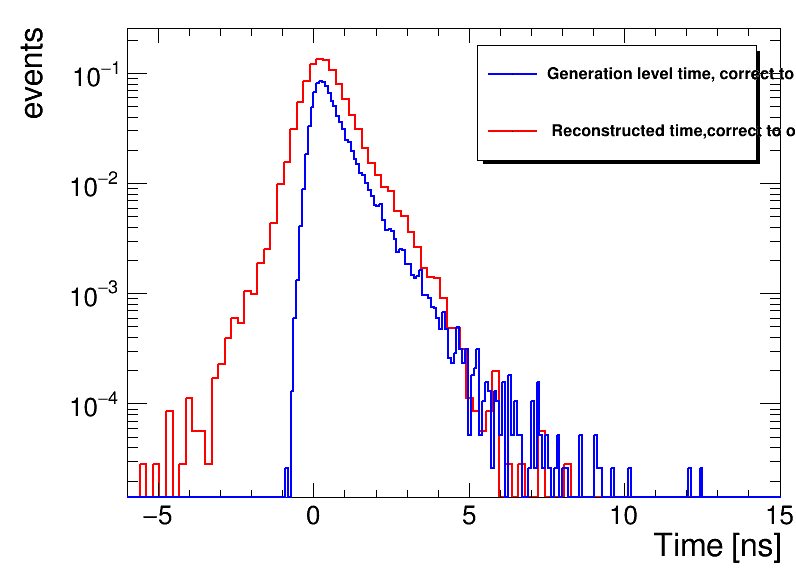

In [21]:
c = rt.TCanvas('c','c', 800, 600)
# h['time_rechitcut'] = create_TH1D( max_jet_reco_time1, axis_title=['Reconstructed time [ns]', 'events'], name='max_jet_reco_time', binning=[100,-6,10])
h['time_reco'] = create_TH1D(reco_time, axis_title=['Time [ns]', 'events'], name='max_jet_ecal', binning=[100,-6,15])
h['time_gen'] = create_TH1D(gen_time, axis_title=['Time [ns]', 'events'], name='max_jet_ecal', binning=[250,-8,15])
h['time_gen'].SetLineColor(4)
h['time_reco'].SetLineColor(2)





c.SetLogy()
h['time_reco'].DrawNormalized()
h['time_gen'].DrawNormalized('same')
leg = rt.TLegend(0.6,0.72,0.95,0.92)
# leg.SetTextFont(42)
leg.SetTextSize(0.03)
leg.SetEntrySeparation(0.01)
leg.AddEntry(h['time_gen'],"Generation level time, correct to origin")
leg.AddEntry(h['time_reco'],' Reconstructed time,correct to origin')
leg.Draw()
c.Draw()



# Time response in rechit cut

In [ ]:
gLLP_daughter_match_jet_index = T['gLLP_daughter_match_jet_index']
gLLP_daughter_travel_time = T['gLLP_daughter_travel_time']
matched_jets = np.logical_and(np.logical_not( gLLP_daughter_travel_time == -666), np.logical_not( gLLP_daughter_match_jet_index == 666))
gLLP_daughter_match_jet_index = gLLP_daughter_match_jet_index[matched_jets]
jet_rechits_T =  T['jet_rechits_T']
jet_rechits_E =  T['jet_rechits_E']
gen_time = T['gen_time']

time_diff_rechit = []
time_rechitcut = []
rechits = [x / 2.0 for x in range(0, 10, 1)]
algo = 0 #energy weighted mean
for rechit in rechits:
    reco_time_rechit = []
    time_diff = []
    for i in range(len(T['gLLP_daughter_match_jet_index'])): #loop through each event
        for j in range(4): #loop through each gen particle
            index = T['gLLP_daughter_match_jet_index'][i][j]
            if not index == 666 and matched_jets[i][j]: #matched and barrel jets
                t_reco = rechit_T_1[i][index]
                reco_temp = getRecoTime(algo, rechit,jet_rechits_T[i][index],jet_rechits_E[i][index])
                if not reco_temp == None:
                    time_diff.append(reco_temp-gen_time[i][j])
                    reco_time_rechit.append(reco_temp)
               
    time_diff = np.array(time_diff)
    time_diff_rechit.append(time_diff)
    reco_time_rechit = np.array(reco_time_rechit)
    time_rechitcut.append(reco_time_rechit)
    print(rechit,time_diff.shape)


In [ ]:
draw = False
c = rt.TCanvas('c1','c1', 800, 600)
leg = rt.TLegend(0.65,0.60,0.95,0.92)
# leg.SetTextFont(42)
leg.SetTextSize(0.03)
leg.SetEntrySeparation(0.01)
# # Create 2d numpy array matched-jets vs. LLP decay radius
h = {}
proj = []



    
for i in range(len(rechits)):
    key = 'bin'+str(i)
    h['time_rechitcut'] = create_TH1D(time_diff_rechit[i], axis_title=['t_Reco - t_gen', 'events'], name="h"+str(i), binning=[12000,-10,10])

    proj.append(h['time_rechitcut'])


proj[0].GetYaxis().SetTitle("Events")
# proj[0].GetYaxis().SetRangeUser(0,1)
line_color = [1,2,3,6,8]
draw_bins = [1]
draw=False
if draw:
    for j in range(len(draw_bins)):
        i = draw_bins[j]
        if i == 0:
            leg.AddEntry(proj[i],'no ECAL rechit cut')

        else:
            leg.AddEntry(proj[i],'ECAL rechit cut '+str(rechits[i])+' GeV')
        
        proj[i].SetLineColor(line_color[j])
        print(proj[i].Integral())
        proj[i].Rebin(100)
        proj[i].Scale(1./proj[i].Integral())

        if j == 0:
            proj[i].DrawCopy()
        if j == 2:
            proj[i].SetLineColor(4)

        proj[i].DrawCopy('SAME')

    leg.Draw()
#     c.SetLogy()
    c.Draw()
    c.SaveAs("../plots/time_response_rechit.pdf")
# c.SaveAs('time_response_ecal.pdf')
assert(len(rechits) == len(proj))

In [ ]:
sigma_eff = True
c = rt.TCanvas('c', 'c', 800, 600)

rt.gStyle.SetOptFit(2200)

# rt.gStyle.SetOptStat(000)

x_bins = [x for x in rechits]
x_bins.append(x_bins[1]-x_bins[0]+x_bins[-1])
print(x_bins)
assert(len(x_bins)-1 == len(proj))
res = rt.TH1F('res','res',len(rechits),array( 'f', x_bins))
res_eff = rt.TH1F('res_eff','res_eff', len(rechits),array( 'f', x_bins))
scale = rt.TH1F('scale','scale',len(rechits),array( 'f', x_bins))
scale_gaus = rt.TH1F('scale_gaus','scale_gaus',len(rechits),array( 'f', x_bins))

for i in range(len(proj)):
    h1 = proj[i] 
    hnew = h1.Clone("hnew")
    hnew = hnew.Rebin(30)
    SS = rt.TSpectrum()
    n_pks = SS.Search(hnew, 0.1, "", 0.5)
    x_pos = SS.GetPositionX()
    y_pos = SS.GetPositionY()
    pks = []

    n_pk = hnew.FindBin(x_pos[0])
    thr = 0.4* hnew.GetBinContent(n_pk)
    n_low = n_pk
    while hnew.GetBinContent(n_low) > thr:
        n_low -= 1
    x_low = hnew.GetBinCenter(n_low)    
    n_up = n_pk
    while hnew.GetBinContent(n_up) > thr:
        n_up += 1
    x_up = hnew.GetBinCenter(n_up)
    r = hnew.Fit('gaus', 'LRSQ+', '', x_low, x_up)
    r = r.Get()
    scale_gaus.SetBinContent(i+1,r.Parameter(1))
    scale_gaus.SetBinError(i+1,r.ParError(1))
    scale.SetBinContent(i+1,hnew.GetMean())
    scale.SetBinError(i+1,hnew.GetMeanError())
    res.SetBinContent(i+1,r.Parameter(2))
    res.SetBinError(i+1,r.ParError(2))
    if abs(r.Parameter(1)-hnew.GetMean())>1:
        print("scale fit warning", i,r.Parameter(1),hnew.GetMean())
    if n_pks == 0:
        hnew.SetLineColor(4)
        hnew.Rebin(2)
        print(r)
#         print(r.Parameter(1))
        hnew.GetXaxis().SetRangeUser(-5,5)
        hnew.DrawCopy()
        print("0 peaks",i)
        break

    if sigma_eff:
        n_pk = h1.FindBin(r.Parameter(1))
        thr = 0.68 * h1.Integral()
        counter = h1.GetBinContent(n_pk)*1.0
        n_low = n_pk
        n_up = n_pk
        flag = True
        while counter < thr:
            if flag:
                n_low -= 1
                counter += h1.GetBinContent(n_low)
            else:
                n_up += 1
                counter += h1.GetBinContent(n_up)
            flag = not flag
        sigma_eff = (n_up - n_low) *h1.GetBinWidth(1)
#         sigma_eff = h1.GetStdDev()
        res_eff.SetBinContent(i+1,sigma_eff)
        res_eff.SetBinError(i+1,hnew.GetStdDevError())

draw_scale = 0
if draw_scale:
    legend = rt.TLegend(0.62,0.20,0.95,0.4)
    legend.SetTextSize(0.03)
    legend.AddEntry(scale_gaus,'Calculated Mean')
    legend.AddEntry(scale,'Mean from Gaussian FIt')
    scale.GetXaxis().SetRangeUser(0,400)
#     scale.GetYaxis().SetRangeUser(-0.4,0.4)

    scale.SetXTitle('ECAL Rechit cut [GeV]')
    scale.SetYTitle('Time Scale [ns]')
    scale_gaus.SetLineColor(2)
    scale.SetLineColor(4)
    scale.DrawCopy()
    scale_gaus.DrawCopy('same')
    legend.Draw()
    c.Draw()
    c.SaveAs('../plots/time_scale_ecal_rechit.pdf')
else:
    legend = rt.TLegend(0.62,0.70,0.95,0.9)
    legend.SetTextSize(0.03)
    legend.AddEntry(res_eff,'Sigma effective')
    legend.AddEntry(res,'Sigma from Gaussian FIt')
    res.SetXTitle('ECAL Rechit cut [GeV]')
    res.SetYTitle('Time Resolution [ns]')
#     res.GetXaxis().SetRangeUser(0,400)
    res.GetYaxis().SetRangeUser(0,1)
    res.SetLineColor(4)
#     res_eff.SetLineColor(4)
    res.DrawCopy()
    res_eff.SetLineColor(2)

    res_eff.DrawCopy('same')
    legend.Draw()
    c.Draw()
    c.SaveAs('../plots/time_res_ecal_rechit.pdf')
c.Draw()
# c.SaveAs('../plots/timediff_ecal_rechit_cut1.pdf')

# Time response in ECAL energy bins

In [ ]:
c = rt.TCanvas('c','c', 800, 600)
h = {}
h['ecal'] = create_TH1D(ecal_energy, axis_title=['ECAL Energy [GeV]', 'events'], name='max_jet_ecal', binning=[100,0,2000])
h['ecal'].SetLineColor(4)
c.SetLogy()
h['ecal'].Draw()
c.Draw()
c.SaveAs("../plots/ecal_energy_ecut1.pdf")

In [5]:
# Look at the number of rechits per jets in different LLP decay radius bin

draw = 0
c = rt.TCanvas('c1','c1', 800, 600)
leg = rt.TLegend(0.57,0.72,0.97,0.92)
# leg.SetTextFont(42)
leg.SetTextSize(0.03)
leg.SetEntrySeparation(0.01)
# # Create 2d numpy array matched-jets vs. LLP decay radius
h = {}
proj = []
time_ecal = np.column_stack((time_diff,ecal_energy))
print(time_ecal.shape)
h['time_ecal'] = create_TH2D(time_ecal, axis_title = ['t_Reco - t_gen [ns]','ECAL energy [GeV]',''], binning=[12000,-5,15,20,0,200])
bins = binning2d(h['time_ecal'],100,'y') #calculate binning with at least 100 events per bin
if draw: bins = [1,3,5,201]

print bins
for i in range(len(bins)-1):
    key = 'bin'+str(i)
    proj.append(h['time_ecal'].ProjectionX("h"+str(i),bins[i],bins[i+1]-1))
    y_low = h['time_ecal'].GetYaxis().GetBinLowEdge(bins[i])
    y_up = h['time_ecal'].GetYaxis().GetBinLowEdge(bins[i+1]-1)+h['time_ecal'].GetYaxis().GetBinWidth(1)
    leg.AddEntry(proj[i],'ECAL energy '+str(y_low)+' - '+str(y_up)+' GeV')


if draw:
    for i in range(len(bins)-1):
        index = len(bins)-2-i
        proj[index].SetLineColor(std_color_list[i])
        proj[index].Rebin(70)
        print(proj[index].Integral())
        proj[index].Scale(1./proj[index].Integral())
        proj[index].GetXaxis().SetRangeUser(-2,3)

        if i == 0:
            proj[len(bins)-2-i].DrawCopy()


        proj[len(bins)-2-i].DrawCopy('SAME')

    leg.Draw()
    c.SetLogy()
    c.Draw()
    c.SaveAs("../plots/time_response_ecal_ecut1.pdf")
assert(len(bins)-1 == len(proj))


(20079, 2)
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20]


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: trd (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: trd (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: scale (Potential memory leak).
Info in <TCanvas::Print>: pdf file ../plots/time_res_ecal_energy_ecut1.pdf has been created


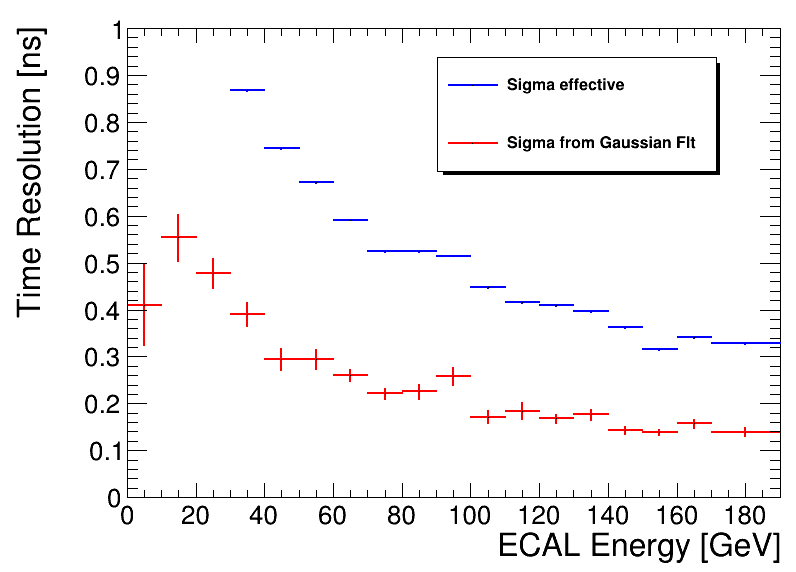

In [8]:
c = rt.TCanvas('c', 'c', 800, 600)
legend = rt.TLegend(0.55,0.70,0.9,0.9);


rt.gStyle.SetOptStat(000)
# print(h['time_ecal'].GetXaxis().GetNbins())
assert(len(bins)-1 == len(proj))

bw = h['time_ecal'].GetYaxis().GetBinWidth(1)
left_edge = h['time_ecal'].GetYaxis().GetBinLowEdge(1)

x_bins = [(x-1)*bw+left_edge for x in bins]
res = rt.TH1F('trd','res', len(bins)-1,array( 'f', x_bins))
res_eff = rt.TH1F('trd','res_eff', len(bins)-1,array( 'f', x_bins))

scale = rt.TH1F('scale','scale',len(bins)-1,array( 'f', x_bins))
for i in range(len(proj)):
    h1 = proj[i]

   
    hnew = h1.Clone("hnew")
    hnew = hnew.Rebin(50)
    SS = rt.TSpectrum()
    n_pks = SS.Search(hnew, 0.1, "", 0.5)
    x_pos = SS.GetPositionX()
    y_pos = SS.GetPositionY()
    pks = []
    if n_pks == 0:
        hnew.SetLineColor(4)
        hnew.Rebin(2)
        hnew.GetXaxis().SetRangeUser(-5,5)
        hnew.DrawCopy()
        print('n_pks == 0',i,hnew.Integral(),n_pks)
        break
    n_pk = hnew.FindBin(x_pos[0])
    thr = 0.5 * hnew.GetBinContent(n_pk)
    n_low = n_pk
    while hnew.GetBinContent(n_low) > thr:
        n_low -= 1
    x_low = hnew.GetBinCenter(n_low)    
    n_up = n_pk
    while hnew.GetBinContent(n_up) > thr:
        n_up += 1
    x_up = hnew.GetBinCenter(n_up)
    r = hnew.Fit('gaus', 'LRSQ+', '', x_low, x_up)
    r = r.Get()
    scale.SetBinContent(i+1,r.Parameter(1))
    scale.SetBinError(i+1,r.ParError(1))
    if abs(r.Parameter(1)-hnew.GetMean())>1:
        print("scale fit warning", i,r.Parameter(1),hnew.GetMean())

    
    n_pk = h1.FindBin(r.Parameter(1))
    thr = 0.68 * h1.Integral()
    counter = h1.GetBinContent(n_pk)*1.0
    n_low = n_pk
    n_up = n_pk
    flag = True
    while counter < thr:
        if flag:
            n_low -= 1
            counter += h1.GetBinContent(n_low)
        else:
            n_up += 1
            counter += h1.GetBinContent(n_up)
        flag = not flag
    sigma_eff = (n_up - n_low) *h1.GetBinWidth(1)
#         sigma_eff = h1.GetStdDev()
    res_eff.SetBinContent(i+1,sigma_eff)
    res_eff.SetBinError(i+1,h1.GetBinWidth(1))
    res.SetBinContent(i+1,r.Parameter(2))
    res.SetBinError(i+1,r.ParError(2))



# scale,scale_eff, res,res_eff = histo2D_projectionFit(h['time_ecal'],bins,0.5, 'y')

legend.SetTextSize(0.03)
legend.AddEntry(res_eff,'Sigma effective')
legend.AddEntry(res,'Sigma from Gaussian FIt')




draw_scale = 0
if draw_scale:
#     scale.GetXaxis().SetRangeUser(0,800)
#     scale.GetYaxis().SetRangeUser(-0.4,0.4)
    scale.SetXTitle('ECAL Energy [GeV]')
    scale.SetYTitle('Time Scale [ns]')
    scale.SetLineColor(4)
    scale.DrawCopy()
    c.Draw()
    c.SaveAs('../plots/time_scale_ecal_energy_ecut1.pdf')
else:
    res.SetXTitle('ECAL Energy [GeV]')
    res.SetYTitle('Time Resolution [ns]')
#     res.GetXaxis().SetRangeUser(0,800)
    res.GetYaxis().SetRangeUser(0,1)
    res.SetLineColor(2)
    res_eff.SetLineColor(4)
    res.DrawCopy()
    res_eff.DrawCopy('same')
    legend.Draw()
    c.Draw()
    c.SaveAs('../plots/time_res_ecal_energy_ecut1.pdf')
# c.Draw()


# Time response in t_gen

In [ ]:
c = rt.TCanvas('c','c', 800, 600)
h = {}
time_diff_algorithm
h['t_gen'] = create_TH1D(gen_time, axis_title=['t_gen[ns]]', 'events'], name='max_jet_ecal', binning=[100,-1,10])
h['t_gen'].SetLineColor(4)
c.SetLogy()
h['t_gen'].Draw()
c.Draw()
c.SaveAs("../plots/tgen.pdf")

In [9]:
draw = 0
c = rt.TCanvas('c1','c1', 800, 600)
leg = rt.TLegend(0.65,0.72,0.95,0.92)
# leg.SetTextFont(42)
leg.SetTextSize(0.03)
leg.SetEntrySeparation(0.01)
# # Create 2d numpy array matched-jets vs. LLP decay radius
h = {}
proj = []
bin_low, bin_up = 30,50
time_tgen = np.column_stack((time_diff,gen_time))
h['time_tgen'] = create_TH2D(time_tgen, axis_title = ['t_Reco - t_gen','t_gen [ns]',''], binning=[6000,-2,2,500,-1,10])
bins = binning2d(h['time_tgen'],100,'y') #calculate binning with at least 100 events per bin
if draw:
    bins = [1,50,100,301]

for i in range(len(bins)-1):
    key = 'bin'+str(i)
    proj.append(h['time_tgen'].ProjectionX("h"+str(i),bins[i],bins[i+1]-1))
    y_low = h['time_tgen'].GetYaxis().GetBinLowEdge(bins[i])
    y_up = h['time_tgen'].GetYaxis().GetBinLowEdge(bins[i+1]-1)+h['time_tgen'].GetYaxis().GetBinWidth(1)
    leg.AddEntry(proj[i],'t_gen '+str(y_low)+' - '+str(y_up)+' ns')

proj[0].GetYaxis().SetTitle("Events")
# proj[0].GetYaxis().SetRangeUser(0,1)

for i in range(len(bins)-1):
    proj[i].SetLineColor(i+1)
    if draw:
        proj[i].Rebin(60)
        print(proj[i].Integral())
        proj[i].Scale(1./proj[i].Integral())
    #     proj[i].GetYaxis().SetRangeUser(0,0.5)

        if i == 0:
            proj[i].DrawCopy()
        if i == 2:
            proj[i].SetLineColor(4)

        proj[i].DrawCopy('SAME')
if draw:
    leg.Draw()
    c.SetLogy()
    c.Draw()
    c.SaveAs('../plots/time_response_tgen.pdf')
assert(len(bins)-1 == len(proj))


[1, 37, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 104, 105, 106, 108, 110, 112, 114, 116, 118, 120, 122, 124, 126, 128, 131, 134, 137, 140, 144, 148, 151, 155, 160, 165, 172, 181, 189, 202, 221, 254, 501]


('npks == 0', 82, 135.0, 0)


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: res (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: res_eff (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: scale (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: scale_eff (Potential memory leak).
Info in <TCanvas::Print>: pdf file ../plots/time_scale_tgen.pdf has been created


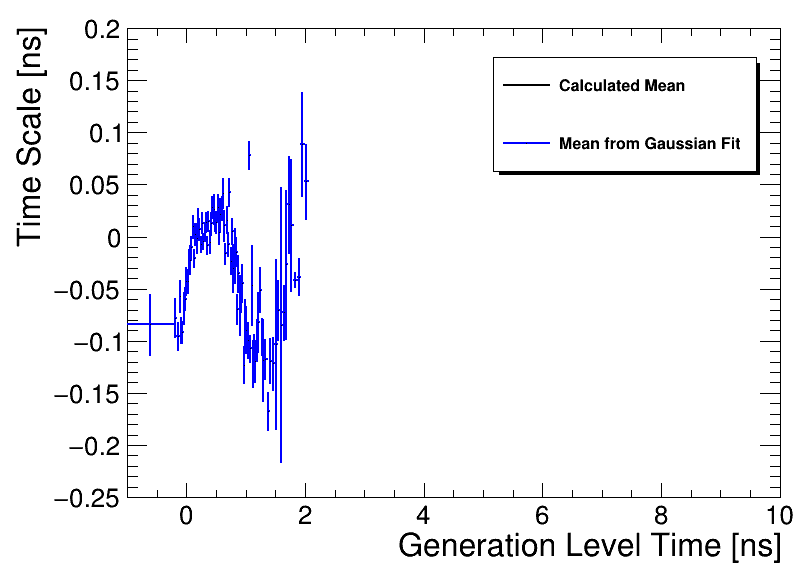

In [14]:
c = rt.TCanvas('c', 'c', 800, 600)

scale, scale_eff, res,res_eff = histo2D_projectionFit(h['time_tgen'], bins, 0.1, 50, 'y')

legend = rt.TLegend(0.2,0.70,0.55,0.9);
legend.SetTextSize(0.03)

draw_scale = 1
if draw_scale:
    legend = rt.TLegend(0.62,0.70,0.95,0.9);
    legend.SetTextSize(0.03)
    legend.AddEntry(scale_eff,'Calculated Mean')
    legend.AddEntry(scale,'Mean from Gaussian Fit')
    scale.SetXTitle('Generation Level Time [ns]')
    scale.SetYTitle('Time Scale [ns]')
    scale.SetLineColor(4)
    scale.GetYaxis().SetRangeUser(-0.25,0.2)
    scale.DrawCopy()
    scale.DrawCopy('same')
    scale.DrawCopy('same')
    legend.Draw()
    c.Draw()
    c.SaveAs('../plots/time_scale_tgen.pdf')
else:
    legend = rt.TLegend(0.2,0.70,0.55,0.9);
    legend.SetTextSize(0.03)
    legend.AddEntry(res_eff,'Sigma effective')
    legend.AddEntry(res,'Sigma from Gaussian Fit')
    res_eff.SetXTitle('Generation Level Time [ns]')
    res_eff.SetYTitle('Time Resolution [ns]')
    res_eff.GetYaxis().SetRangeUser(0,1.6)
    res.SetLineColor(2)
    res_eff.SetLineColor(4)
#     res.GetXaxis().SetRangeUser(0,2)
    res_eff.DrawCopy()
    res.DrawCopy('same')
    legend.Draw()
    c.Draw()
    c.SaveAs('../plots/time_res_tgen_zoom.pdf')

c.Draw()